In [1]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc' #CHANGE AS NEEDED

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params as params

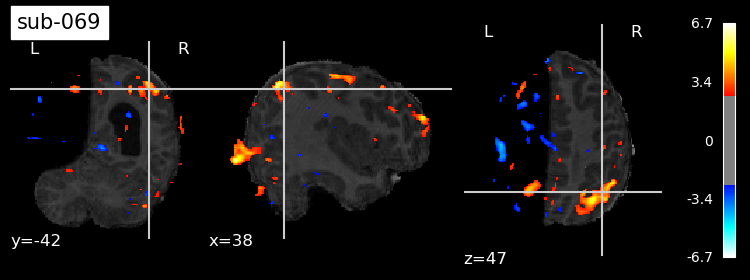

In [2]:
##single subject

data_dir = params.data_dir
raw_dir = params.raw_dir  
sub = 'sub-069'

stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope3.feat/stats/zstat1.nii.gz'


anat_dir = f"{raw_dir}/{sub}/ses-01"
anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")

sub_dir = f"{data_dir}/{sub}/ses-01"
func = image.load_img(f"{sub_dir}/{stats_file}")
plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
plt.show()
plt.pause(0.0001)

File exists.


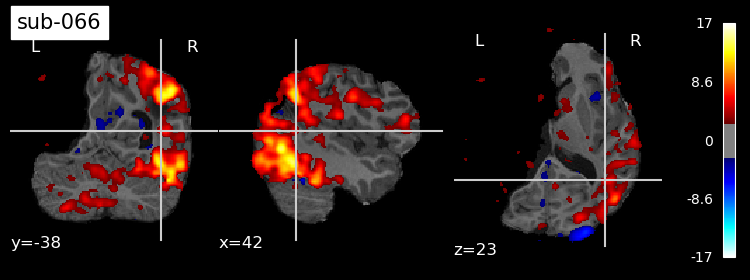

File exists.


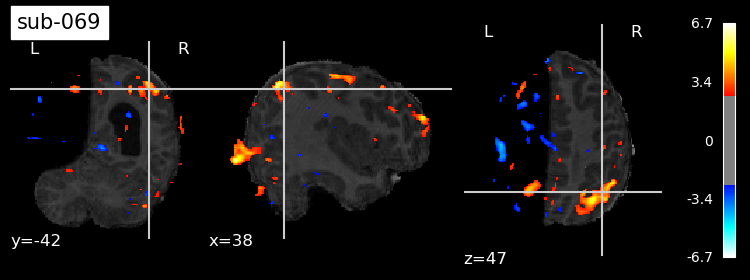

File exists.


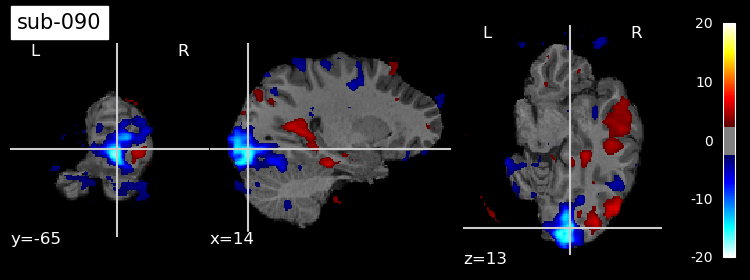

File exists.


In [2]:
##subject loop

data_dir = params.data_dir
raw_dir = params.raw_dir
sub_info = params.sub_info
#sub_info = sub_info.iloc[9:] #I am limiting the subjects to where the break happened this exludes lines above the number listed not including the number listed
stats_file = 'derivatives/fsl/loc/HighLevel.gfeat/cope3.feat/stats/zstat1.nii.gz'

#loop through subs in sub_info
for sub in sub_info['sub']: 
   
    #on each sub set the directory for the anatomical and func
    anat_dir = f"{raw_dir}/{sub}/ses-01"
    anat = image.load_img(f"{anat_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz")
    sub_dir = f"{data_dir}/{sub}/ses-01"
    func = image.load_img(f"{sub_dir}/{stats_file}")
    
    #check if func file exists
    if os.path.exists(f"{sub_dir}/{stats_file}"):
        print("File exists.")
    else:
     print("File does not exist.") 
    
    #plot it
    plotting.plot_stat_map(func,bg_img = anat, threshold = 2.58, title = sub)
    plt.show()
    plt.pause(0.0001)

In [ ]:
#PLOT SINGLE SUBJECT MIRROR AND MASK

mirrored_brain = '/lab_data/behrmannlab/vlad/hemispace/sub-007/ses-01/anat/sub-007_ses-01_T1w_brain_mirrored.nii.gz'
brain_img = image.load_img(mirrored_brain)

hemi_mask = '/lab_data/behrmannlab/vlad/hemispace/sub-025/ses-01/anat/sub-025_ses-01_T1w_brain_mask_Left.nii.gz'
mask_img = image.load_img(hemi_mask)

plotting.plot_anat(brain_img, title='Mirrored Brain')
plotting.plot_anat(mask_img, title='masked hemi') #I want to try and plot the hemimask as well as the mirror file
plt.show()


In [ ]:
#PLOT MIRROR BRAINS FOR PATIENTS - LOOP
sub_info = params.sub_info  # Assuming params is a dictionary containing subject information

for sub in sub_info['sub']:
    mirrored_brain = f'/lab_data/behrmannlab/vlad/hemispace/{sub}/ses-01/anat/{sub}_ses-01_T1w_brain_mirrored.nii.gz'
    
    if os.path.exists(mirrored_brain):
        brain_img = image.load_img(mirrored_brain)
        title = f'Mirrored Brain - Subject {sub}'
        plotting.plot_anat(brain_img, title=title)
        plt.show()
    else:
        print(f"File not found for subject {sub}. Skipping...")
        
        

In [ ]:
#Plot hemi mask looped

sub_info = params.sub_info

for sub in sub_info['sub']:
    hemi = 'Left' # change to right if you want a right mask
    hemi_mask = f'/lab_data/behrmannlab/vlad/hemispace/{sub}/ses-01/anat/{sub}_ses-01_T1w_brain_mask_{hemi}.nii.gz'
    
    if os.path.exists(hemi_mask):
        mask_img = image.load_img(hemi_mask)
        title = f'hemi mask - {sub} {hemi}'
        plotting.plot_anat(mask_img, title=title)
        plt.show()
    else:
        print(f"File not found for subject {sub}. Skipping...")

In [ ]:
study='ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"

roi_list = ["ventral_visual_cortex", "LO", "PFS", "dorsal_visual_cortex", "pIPS", "aIPS"]
#roi_dir = f"{study_dir}/{sub}/ses-01/derivatives/rois/parcels"

#sub = 'sub-004'

def roi_plot(sub, roi_dir, roi_list):
    """
    Plot each ROI onto the patient's brain
    """
    print("Plotting ROIs for", sub)
    
    raw_dir = f"/lab_data/behrmannlab/vlad/hemispace"

    sub_dir = f'{raw_dir}/{sub}/ses-01'
    anat = f'{sub_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz'
    
    for roi in roi_list:
        roi_file = f'{roi_dir}/{roi}.nii.gz'     
        if not os.path.exists(roi_file):
            print(f"ROI file not found: {roi_file}")
            continue
        
        roi_img = image.load_img(roi_file)
        roi_img_resampled = image.resample_to_img(roi_img, anat)

        plotting.plot_roi(roi_img_resampled, bg_img=anat, title=f"ROI: {roi} on: {sub}")
        plt.show()

sub_info = params.sub_info

all_subs = sub_info['sub'].values

for sub, hemi, group in zip(sub_info['sub'], sub_info['intact_hemi'], sub_info['group']):
    
    if sub[:4] != 'sub-':
        sub = 'sub-' + sub
    
    print(sub, hemi, group)
    # Update the roi_dir to include the current subject (sub)
    roi_dir = f"{study_dir}/{sub}/ses-01/derivatives/rois/parcels"
    roi_plot(sub, roi_dir, roi_list)

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



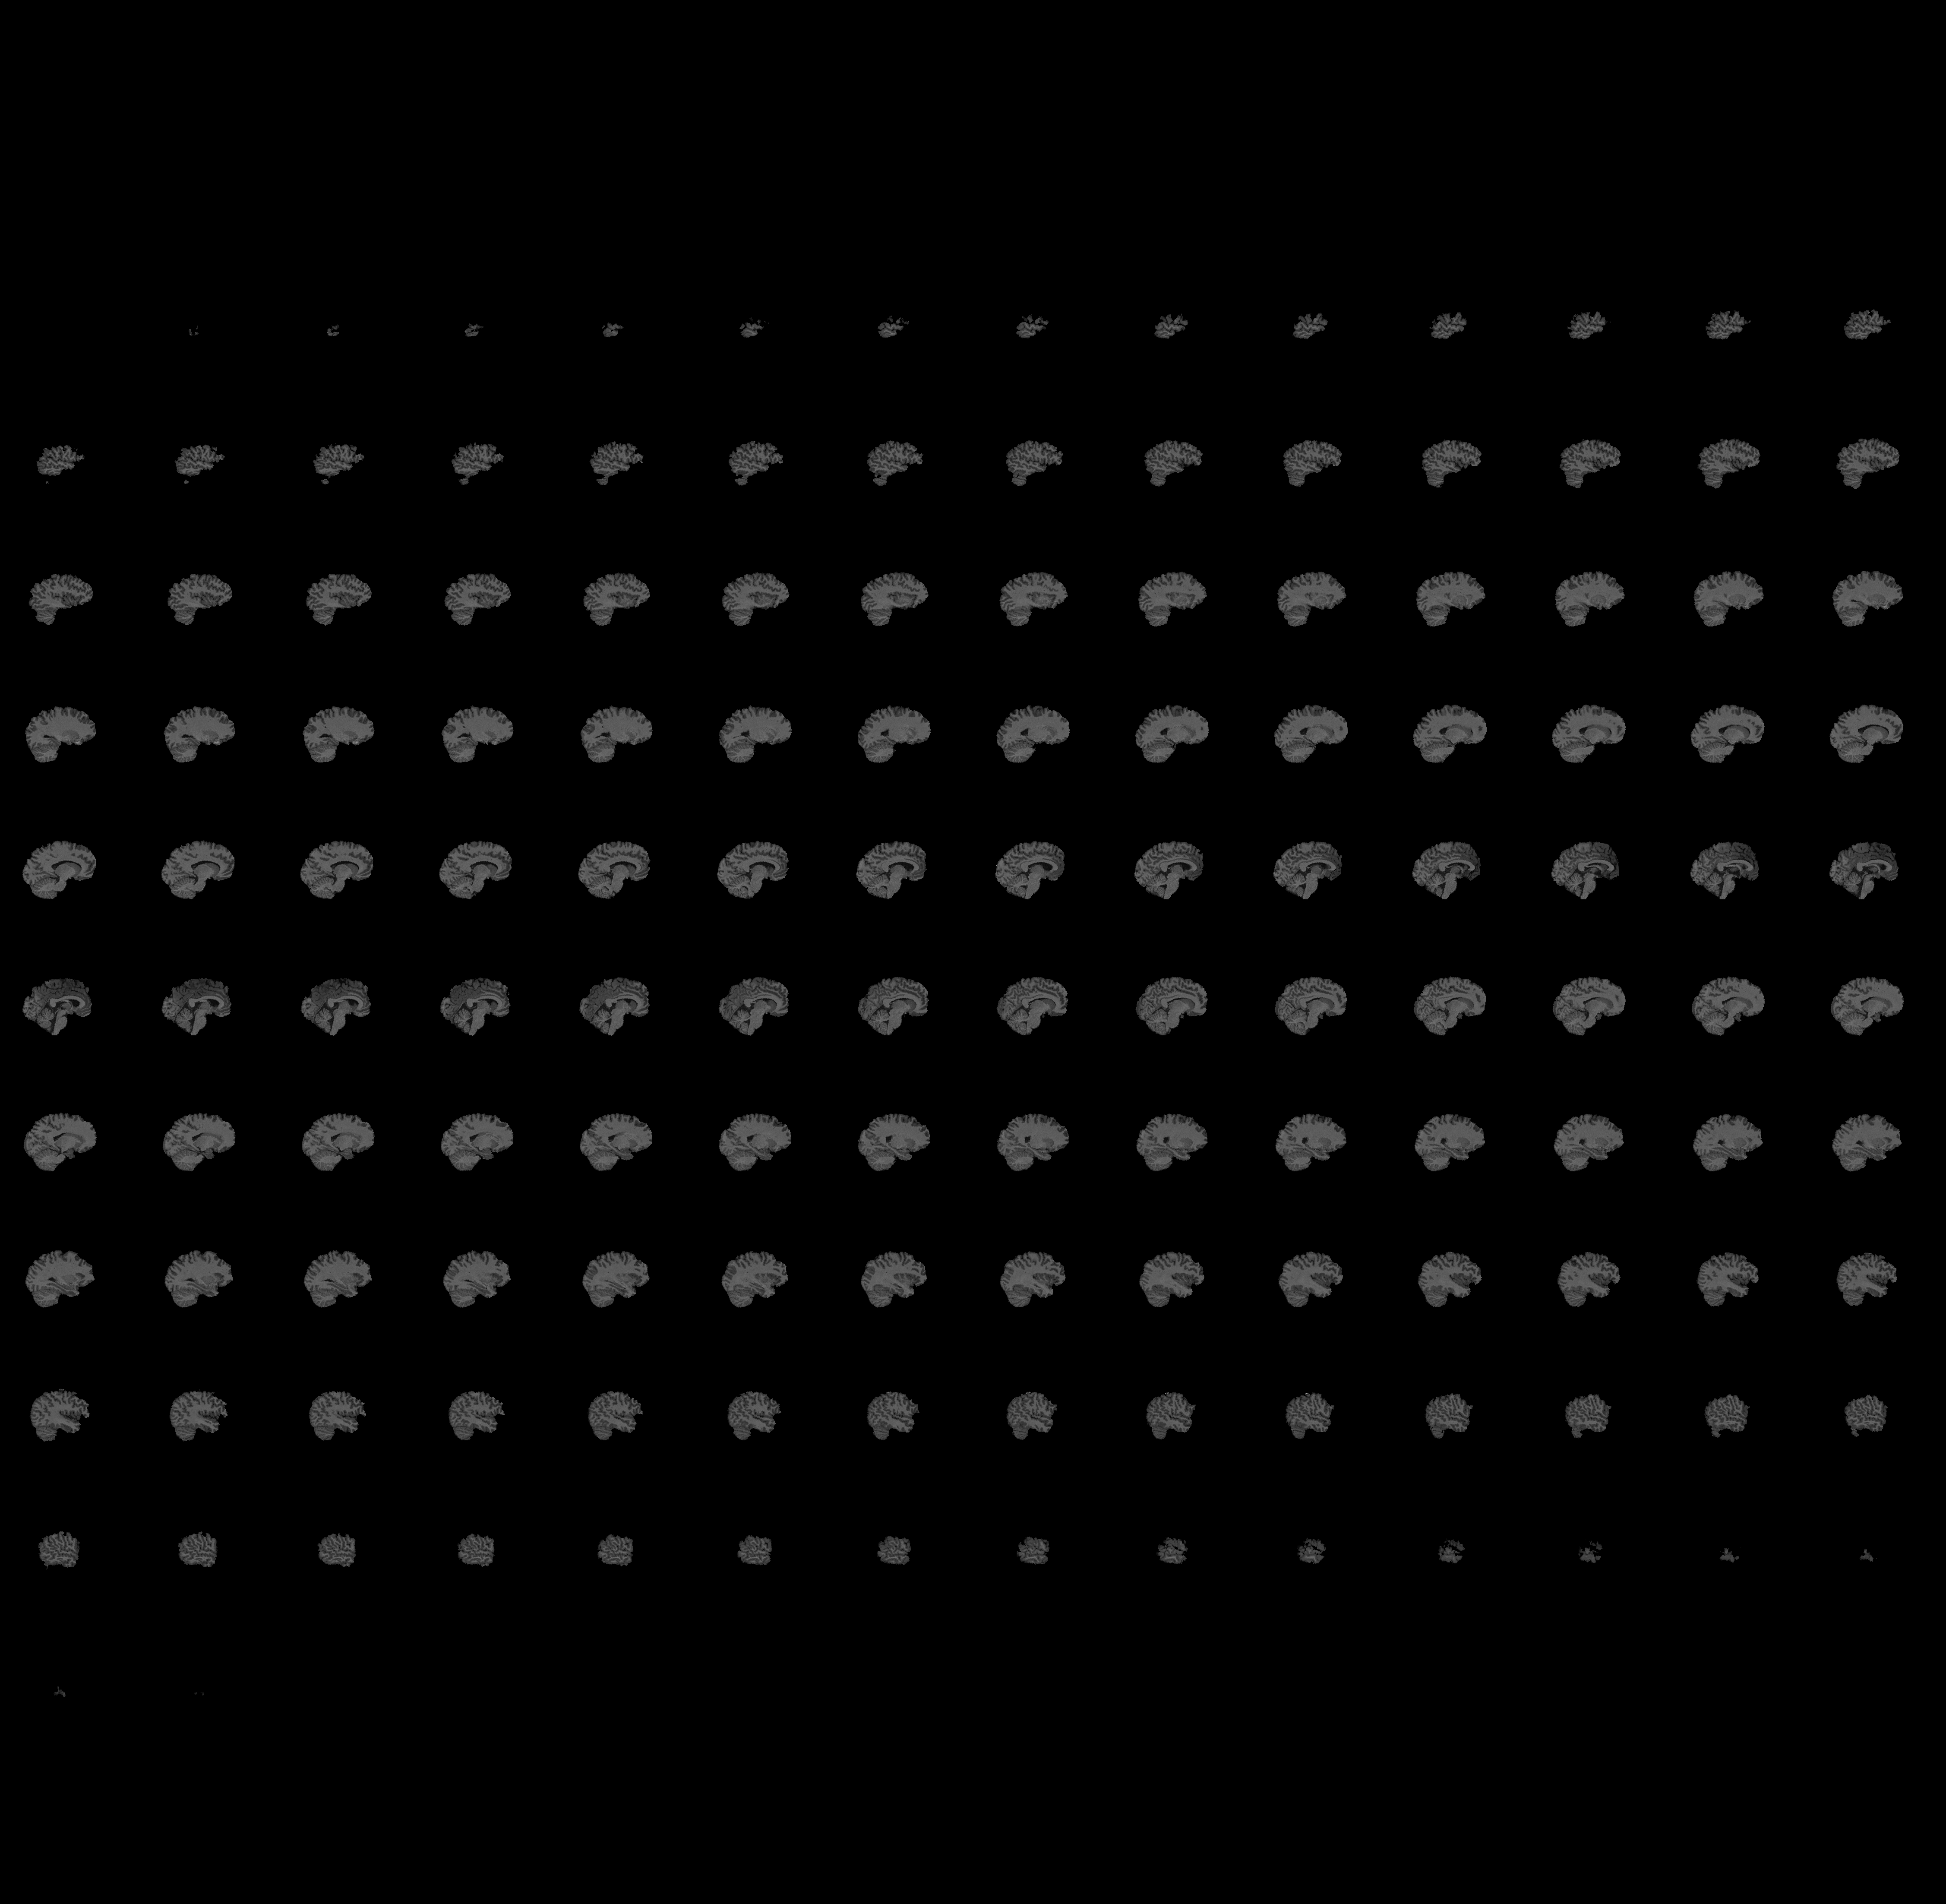
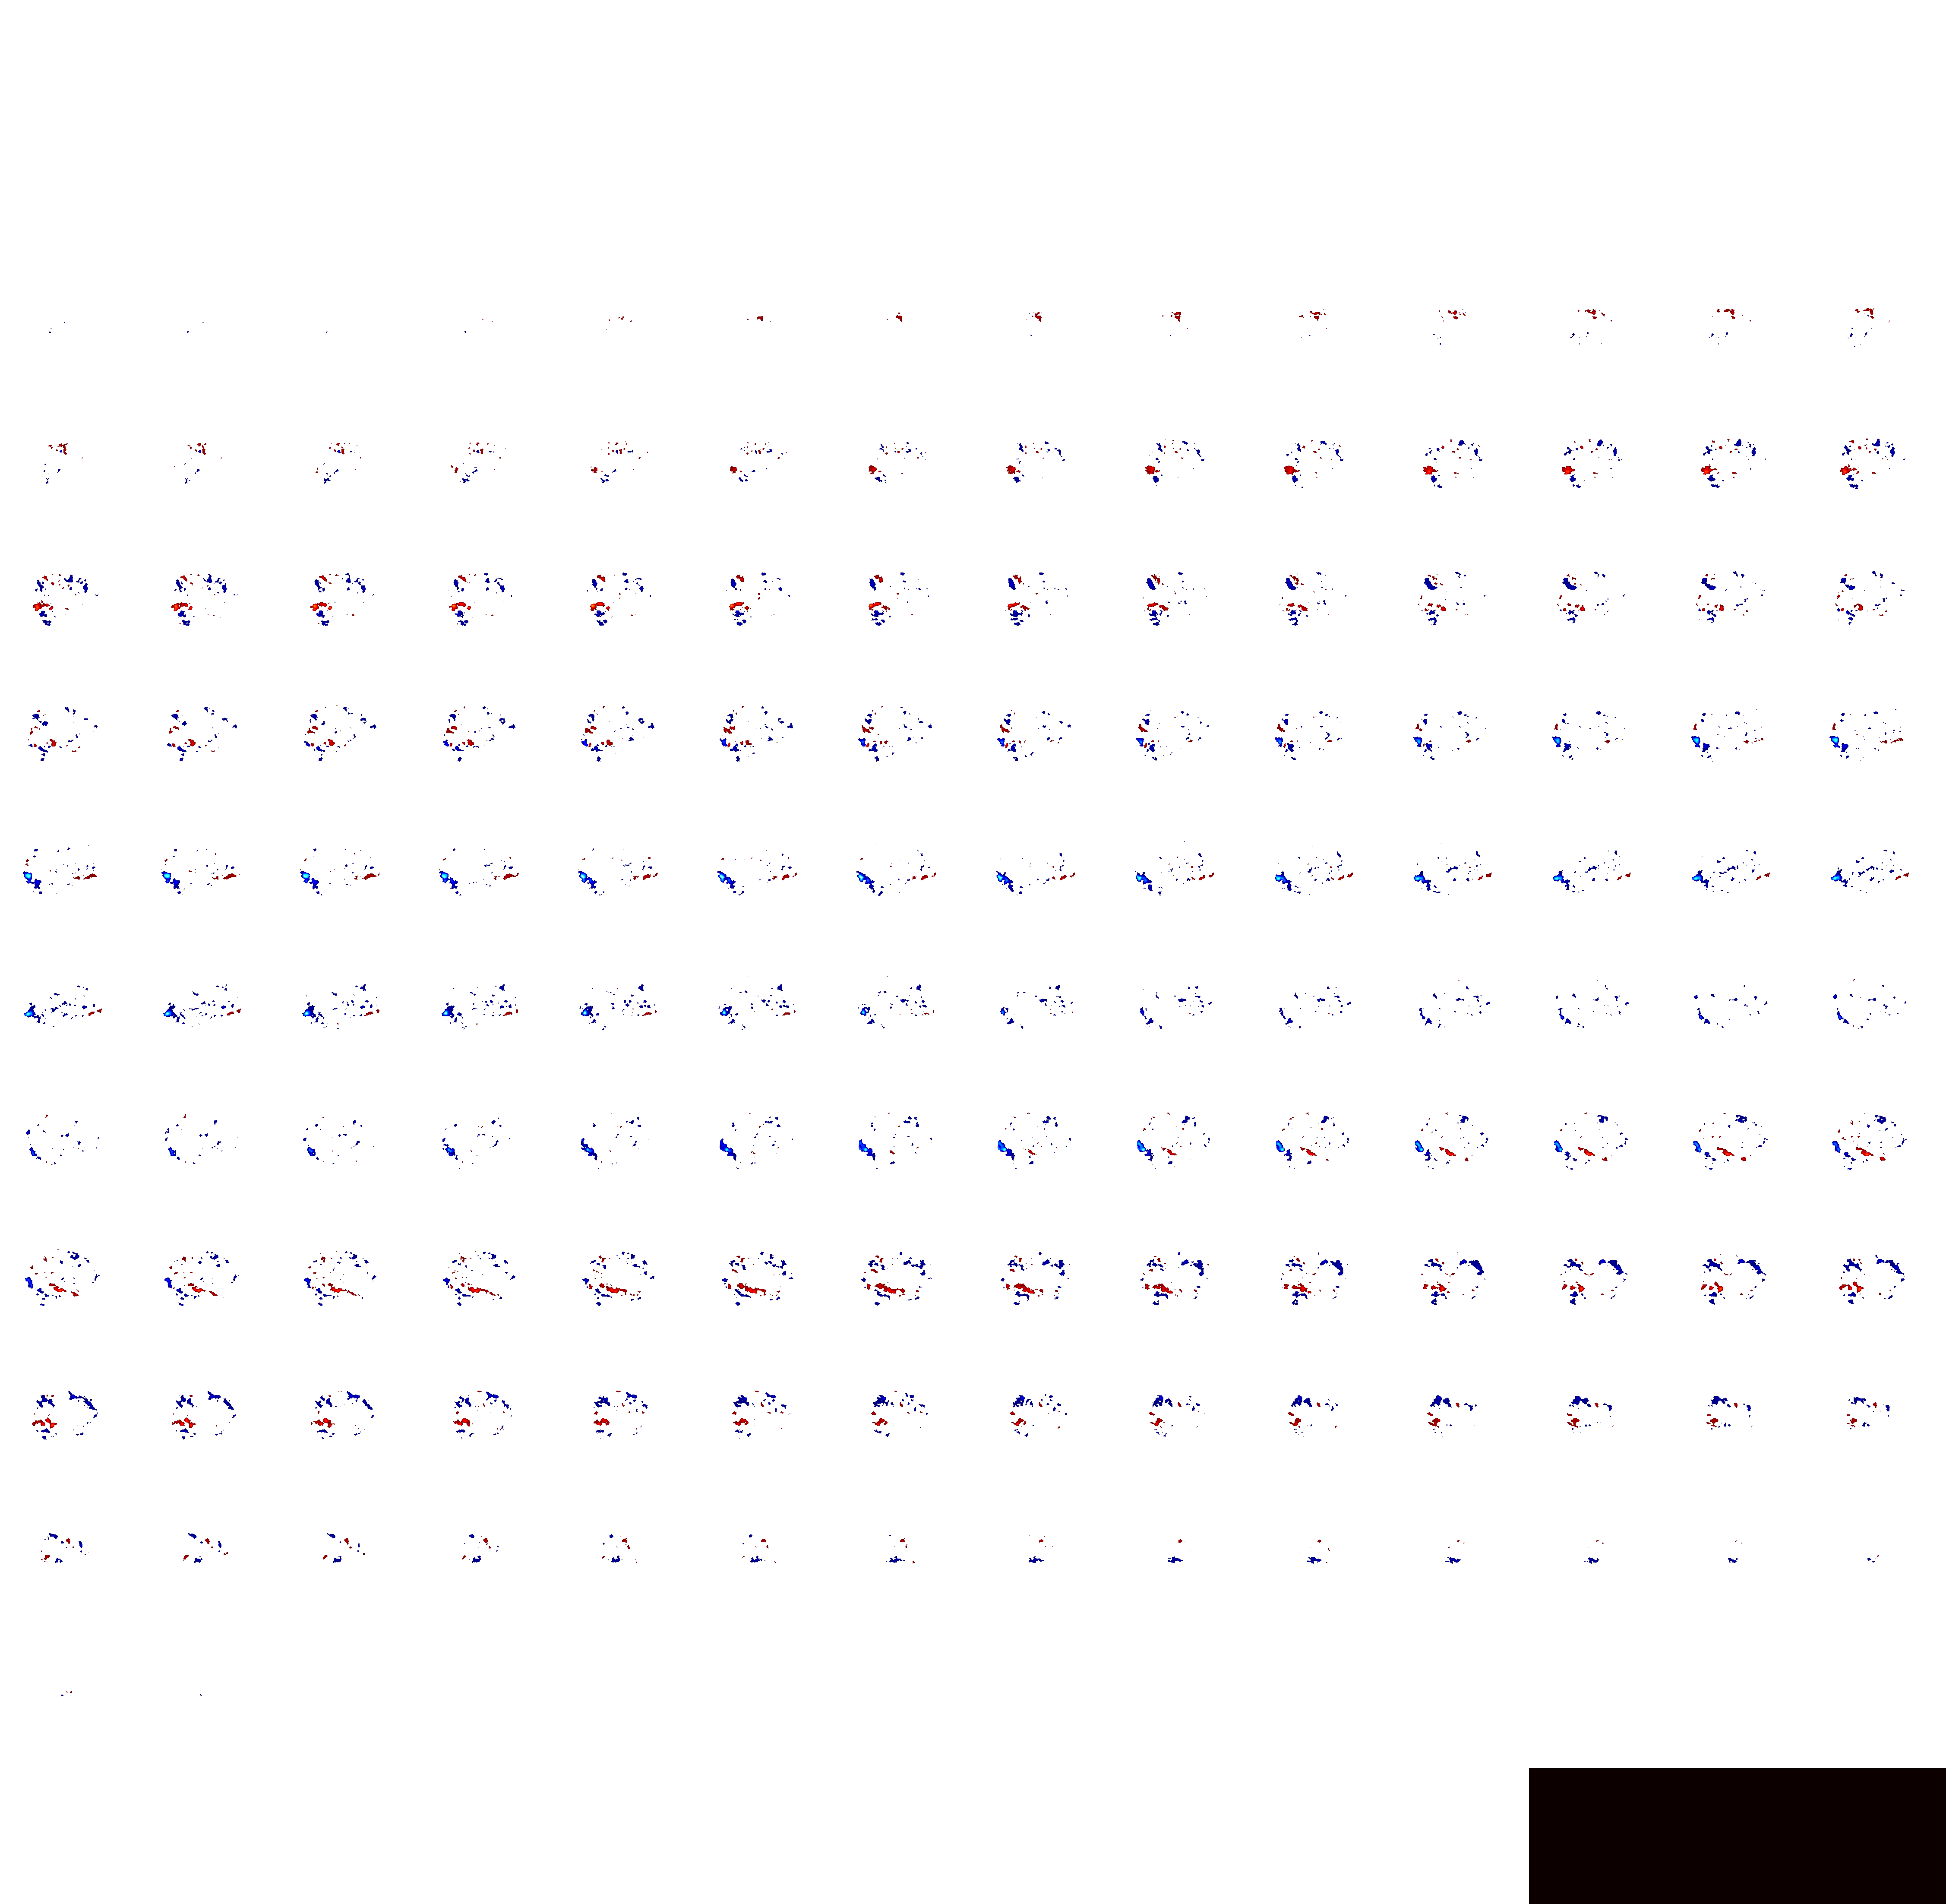

In [19]:
func = image.load_img(f"{sub_dir}/{stats_file}")
plotting.view_img(func,bg_img = anat, threshold = 2.58)


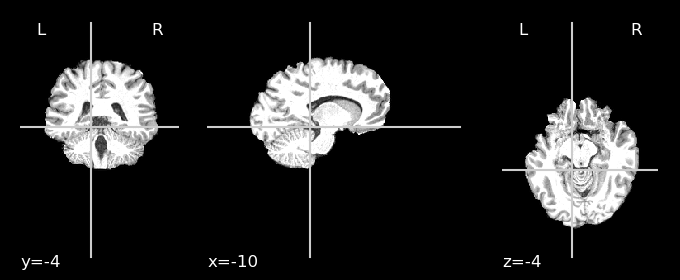

In [14]:
plotting.plot_anat(anat, dim = -1)

In [ ]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir

sub_info = params.sub_info
task_info = params.task_info

suf = params.suf
rois = params.rois
#hemis = params.hemis

#load data summary
data_summary = pd.read_csv(f'{results_dir}/selectivity/selectivity_summary{suf}.csv')

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
#sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


In [ ]:
task = 'loc'
cope = "3"

for sub, group in zip(sub_info['sub'], sub_info['group']):
    sub_dir = f'{data_dir}/{sub}/ses-01'

    
    #register each highlevel to anat
    zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

    #check if zstat exists
    if os.path.exists(zstat_path):
        #load zstat
        zstat = image.load_img(zstat_path)
        #zstat = image.clean_img(zstat,mask_img=mni)
        plotting.plot_glass_brain(zstat, threshold = 3.1, draw_cross = False, colorbar = True, title = f'{sub}')
        
        #add title
        plt.title(f'{sub} {group}')

        plt.show()
        plt.pause(0.0001)

In [ ]:
# create a figure with multiple axes to plot each anatomical image
def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")

#plot_glass_brain(sub_info['sub'], 'loc')